In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
visible_layer_size = 1
hidden_layer_size = 1
seed = 44  # Seed for random number generator
gradient_steps = 500
walker_steps = 1000
learning_rate = 0.05
termination_condition = 1e-5


In [5]:
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
H = utils.random_hamiltonian(2**visible_layer_size)  # Hamiltonian
#H = np.diag(np.random.randint(-5, 6, 2**visible_layer_size))  # Hamiltonia
#H = np.diag([-2, 0, 2, -7])  # Hamiltonian

In [6]:
walker = mcmc.Walker(steps=walker_steps)
rbm = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model_1 = Model(rbm, walker, H)  # Initializing model with RBM and Hamiltonian
model_2 = copy.deepcopy(model_1)  # Cloning model to have two copies to train on
model_3 = copy.deepcopy(model_1)
model_4 = copy.deepcopy(model_1)

In [7]:
print(f"RBM GS energy before training: {model_1.exact_energy()}")
print(f"Exact ground state energy (target): {min(np.linalg.eigvalsh(H))}")

RBM GS energy before training: 3.9443501919681534
Exact ground state energy (target): 0.7692474550377766


In [10]:
# Training models
fd_plot_exact_list = model_1.gradient_descent(gradient_method='finite_difference', exact_dist=True, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)
#analytic_plot_est_list = model_2.gradient_descent(gradient_method='analytical', exact_dist=False, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)
#fd_plot_est_list = model_3.gradient_descent(gradient_method='finite_difference', exact_dist=False, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)
#analytic_plot_exact_list = model_4.gradient_descent(gradient_method='analytical', exact_dist=True, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)


Gradient descent step 1, energy: 3.9443501919681534
Gradient: [ 0.16307611 -0.65764369 -0.65363763 -0.05618002 -0.44780856 -0.17335199]
Gradient descent step 2, energy: 3.8382878563689005
Gradient: [ 0.10817366 -0.73051588 -0.73488388 -0.01401484 -0.53471322 -0.31407035]
Gradient descent step 3, energy: 3.725926067103534
Gradient: [ 0.00796041 -0.72009587 -0.72615922  0.02313137 -0.57067991 -0.39554987]
Gradient descent step 4, energy: 3.6171152580940173
Gradient: [-0.10730779 -0.66456278 -0.66756038  0.05289087 -0.58804983 -0.45017775]
Gradient descent step 5, energy: 3.5103212919340354
Gradient: [-0.22829602 -0.59852635 -0.59416699  0.07156156 -0.60713587 -0.49773691]
Gradient descent step 6, energy: 3.400485134014436
Gradient: [-0.35555541 -0.53516408 -0.51965739  0.07863612 -0.62775712 -0.54085464]
Gradient descent step 7, energy: 3.2866973170918294
Gradient: [-0.48714833 -0.47290574 -0.44324214  0.07423488 -0.64257737 -0.57508252]
Gradient descent step 8, energy: 3.170297582974024

Gradient descent step 74, energy: 0.772855911320756
Gradient: [ 0.06058508 -0.00855746 -0.01492318  0.00055726 -0.00082903 -0.00114085]
Gradient descent step 75, energy: 0.7725950743143556
Gradient: [ 0.0585515  -0.00821231 -0.01434794  0.00159684 -0.0010588  -0.00137117]
Gradient descent step 76, energy: 0.7723371098172988
Gradient: [ 0.05643244 -0.00785999 -0.01375819  0.00244973 -0.00123786 -0.00155104]
Gradient descent step 77, energy: 0.7720834814244932
Gradient: [ 0.05424041 -0.00750322 -0.01315826  0.00307816 -0.00135801 -0.00167218]
Gradient descent step 78, energy: 0.7718355175254576
Gradient: [ 0.05198747 -0.00714439 -0.01255199  0.00346049 -0.00141504 -0.00173036]
Gradient descent step 79, energy: 0.7715945926123877
Gradient: [ 0.04968515 -0.00678551 -0.01194271  0.00359174 -0.00140881 -0.0017254 ]
Gradient descent step 80, energy: 0.7713622027560911
Gradient: [ 0.04734433 -0.00642823 -0.01133321  0.00348288 -0.001343   -0.00166093]
Gradient descent step 81, energy: 0.771139

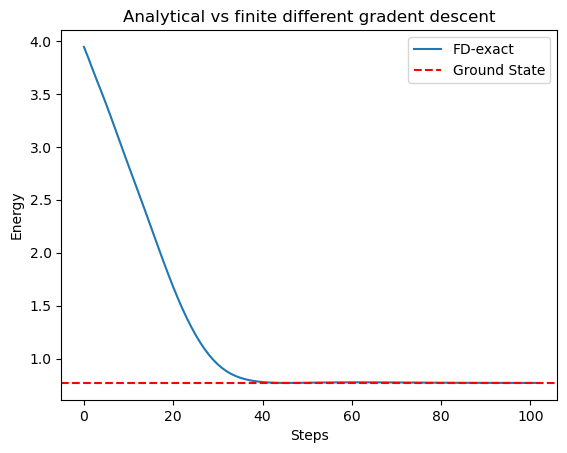

In [11]:
plt.plot(np.real(fd_plot_exact_list), label='FD-exact')
#plt.plot(np.real(fd_plot_est_list), label='FD-estimated')
#plt.plot(np.real(analytic_plot_exact_list), label='Analytical-exact')
#plt.plot(np.real(analytic_plot_est_list), label='Analytical-est')
plt.axhline(y=min(np.linalg.eigvalsh(H)), color='red', linestyle='--', label='Ground State')
plt.title('Analytical vs finite different gradent descent')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.legend()


In [24]:
print(f"Estimated energy FD-exact: {model_1.estimate_energy()}")
print(f"Estimated energy Analytic-estimated: {model_2.estimate_energy()}")
print(f"Estimated energy FD-estimated: {model_3.estimate_energy()}")
print(f"Estimated energy Analytic-exact: {model_4.estimate_energy()}")

Estimated energy FD-exact: -6.979
Estimated energy Analytic-estimated: -6.986
Estimated energy FD-estimated: -6.183
Estimated energy Analytic-exact: -6.979
